In [1]:
library(ggplot2)
library(data.table)
library(dplyr)

Warning message:
“package ‘data.table’ was built under R version 3.2.4”Warning message:
“package ‘dplyr’ was built under R version 3.2.5”------------------------------------------------------------------------------
data.table + dplyr code now lives in dtplyr.
Please library(dtplyr)!
------------------------------------------------------------------------------

Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



# Data

In [6]:
results <- "/home/pieter/Documents/GemeenteNijmegen/smartemission/etl/calibration/io/performance/001475543530_CO_Waarden_grid_search_scores.csv"

In [8]:
data <- data.table(read.csv(results))
head(data)

X,mean_test_score,param_filter__alpha,param_mlp__activation,param_mlp__alpha,param_mlp__hidden_layer_sizes,param_mlp__learning_rate,param_mlp__learning_rate_init,param_mlp__max_iter,param_mlp__solver,⋯,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,std_test_score
0,0.3146884,0.001106555,tanh,1.137219e-06,9,constant,3.429576e-06,200,lbgfs,⋯,0.2601129,0.3833877,0.2642669,0.3105725,0.3173014,0.3287586,0.3044129,0.3291250,0.3343253,0.03521980
1,0.4179643,0.004018270,logistic,1.033543e-05,34,constant,1.074469e-02,200,lbgfs,⋯,0.3911855,0.4495498,0.3860484,0.4508772,0.4761075,0.4170025,0.3989808,0.3981193,0.3938407,0.03079331
2,0.4282557,0.002948984,relu,5.494671e-05,49,constant,7.162211e-04,200,lbgfs,⋯,0.4177138,0.4854402,0.4145876,0.3988566,0.4653965,0.4209961,0.4102694,0.4400455,0.4010082,0.02802491
3,0.3657307,0.039343069,tanh,2.550832e-02,20,constant,4.671155e-06,200,lbgfs,⋯,0.3595505,0.4129654,0.3000291,0.3197194,0.3587643,0.3774928,0.3978946,0.3868138,0.3783537,0.03420018
4,0.4183092,0.068666459,logistic,6.413455e-06,64,constant,4.332204e-03,200,lbgfs,⋯,0.3895699,0.4540399,0.3552557,0.4249876,0.5043822,0.4191471,0.4239388,0.3964265,0.3970706,0.04012880
5,0.4586460,0.010696288,relu,4.006432e-02,119,constant,3.417889e-06,200,lbgfs,⋯,0.4188728,0.5167318,0.4243527,0.4692662,0.5119655,0.4730858,0.4417089,0.4403613,0.4315184,0.03440568


# Best 

In [26]:
best_df <- data %>% 
    filter(rank(-mean_test_score) < 10) %>%
    select(mean_test_score, params) %>%
    arrange(-mean_test_score)
best_df

mean_test_score,params
0.5002643,"{'filter__alpha': 0.0073344041648012058, 'mlp__alpha': 1.899210794532138e-06, 'mlp__max_iter': 200, 'mlp__activation': 'relu', 'mlp__hidden_layer_sizes': 112, 'mlp__learning_rate': 'constant', 'mlp__solver': 'lbgfs', 'mlp__learning_rate_init': 0.07908998568339845}"
0.4986996,"{'filter__alpha': 0.0057780753378321101, 'mlp__alpha': 0.0079692109869337197, 'mlp__max_iter': 200, 'mlp__activation': 'relu', 'mlp__hidden_layer_sizes': 124, 'mlp__learning_rate': 'constant', 'mlp__solver': 'lbgfs', 'mlp__learning_rate_init': 0.0005986062849663925}"
0.4932058,"{'filter__alpha': 0.0047798314264692349, 'mlp__alpha': 0.0029121637253649935, 'mlp__max_iter': 200, 'mlp__activation': 'relu', 'mlp__hidden_layer_sizes': 125, 'mlp__learning_rate': 'constant', 'mlp__solver': 'lbgfs', 'mlp__learning_rate_init': 0.001284860438226463}"
0.4922291,"{'filter__alpha': 0.0031054959495218394, 'mlp__alpha': 0.084315262261987003, 'mlp__max_iter': 200, 'mlp__activation': 'relu', 'mlp__hidden_layer_sizes': 111, 'mlp__learning_rate': 'constant', 'mlp__solver': 'lbgfs', 'mlp__learning_rate_init': 0.0013625824402234183}"
0.4884838,"{'filter__alpha': 0.0069133144769547286, 'mlp__alpha': 0.044210002074334613, 'mlp__max_iter': 200, 'mlp__activation': 'relu', 'mlp__hidden_layer_sizes': 137, 'mlp__learning_rate': 'constant', 'mlp__solver': 'lbgfs', 'mlp__learning_rate_init': 7.5928943024448144e-05}"
0.4882439,"{'filter__alpha': 0.014185614277838248, 'mlp__alpha': 0.00020709286591423368, 'mlp__max_iter': 200, 'mlp__activation': 'relu', 'mlp__hidden_layer_sizes': 82, 'mlp__learning_rate': 'constant', 'mlp__solver': 'lbgfs', 'mlp__learning_rate_init': 1.6183189117192335e-05}"
0.4877156,"{'filter__alpha': 0.0035670834958954054, 'mlp__alpha': 0.053590996625836829, 'mlp__max_iter': 200, 'mlp__activation': 'relu', 'mlp__hidden_layer_sizes': 121, 'mlp__learning_rate': 'constant', 'mlp__solver': 'lbgfs', 'mlp__learning_rate_init': 0.0055728698763429039}"
0.4872993,"{'filter__alpha': 0.0036578387408583123, 'mlp__alpha': 0.0061636146064115759, 'mlp__max_iter': 200, 'mlp__activation': 'relu', 'mlp__hidden_layer_sizes': 139, 'mlp__learning_rate': 'constant', 'mlp__solver': 'lbgfs', 'mlp__learning_rate_init': 3.3484455809444408e-05}"
0.4859759,"{'filter__alpha': 0.022729557992773843, 'mlp__alpha': 0.051677768939026328, 'mlp__max_iter': 200, 'mlp__activation': 'relu', 'mlp__hidden_layer_sizes': 103, 'mlp__learning_rate': 'constant', 'mlp__solver': 'lbgfs', 'mlp__learning_rate_init': 0.094941606707656098}"


# Parameters

In [10]:
df <- data %>%
    mutate(mean_test_score = abs(mean_test_score),
           rank_test_score = min_rank(-mean_test_score),
           top = rank_test_score < 10, 
           stderr_test_score = std_test_score / sqrt(9), 
           best_filter_range = param_filter__alpha < 0.1 & param_filter__alpha > 0.001) %>%
    select(-X,-params, -starts_with("split"))
params <- setdiff(names(df), "mean_test_score")
df %>% filter(top == TRUE)

mean_test_score,param_filter__alpha,param_mlp__activation,param_mlp__alpha,param_mlp__hidden_layer_sizes,param_mlp__learning_rate,param_mlp__learning_rate_init,param_mlp__max_iter,param_mlp__solver,rank_test_score,std_test_score,top,stderr_test_score,best_filter_range
0.4872993,0.003657839,relu,6.163615e-03,139,constant,3.348446e-05,200,lbgfs,8,0.04010279,TRUE,0.01336760,TRUE
0.4884838,0.006913314,relu,4.421000e-02,137,constant,7.592894e-05,200,lbgfs,5,0.04019991,TRUE,0.01339997,TRUE
0.4932058,0.004779831,relu,2.912164e-03,125,constant,1.284860e-03,200,lbgfs,3,0.03743982,TRUE,0.01247994,TRUE
0.5002643,0.007334404,relu,1.899211e-06,112,constant,7.908999e-02,200,lbgfs,1,0.02756730,TRUE,0.00918910,TRUE
0.4986996,0.005778075,relu,7.969211e-03,124,constant,5.986063e-04,200,lbgfs,2,0.03550041,TRUE,0.01183347,TRUE
0.4859759,0.022729558,relu,5.167777e-02,103,constant,9.494161e-02,200,lbgfs,9,0.03224021,TRUE,0.01074674,TRUE
0.4877156,0.003567083,relu,5.359100e-02,121,constant,5.572870e-03,200,lbgfs,7,0.03831760,TRUE,0.01277253,TRUE
0.4922291,0.003105496,relu,8.431526e-02,111,constant,1.362582e-03,200,lbgfs,4,0.03959545,TRUE,0.01319848,TRUE
0.4882439,0.014185614,relu,2.070929e-04,82,constant,1.618319e-05,200,lbgfs,6,0.03540984,TRUE,0.01180328,TRUE


# Parameter: filter__alpha
Best scores are between 0.1 and 0.001. Average best score is around 0.01.

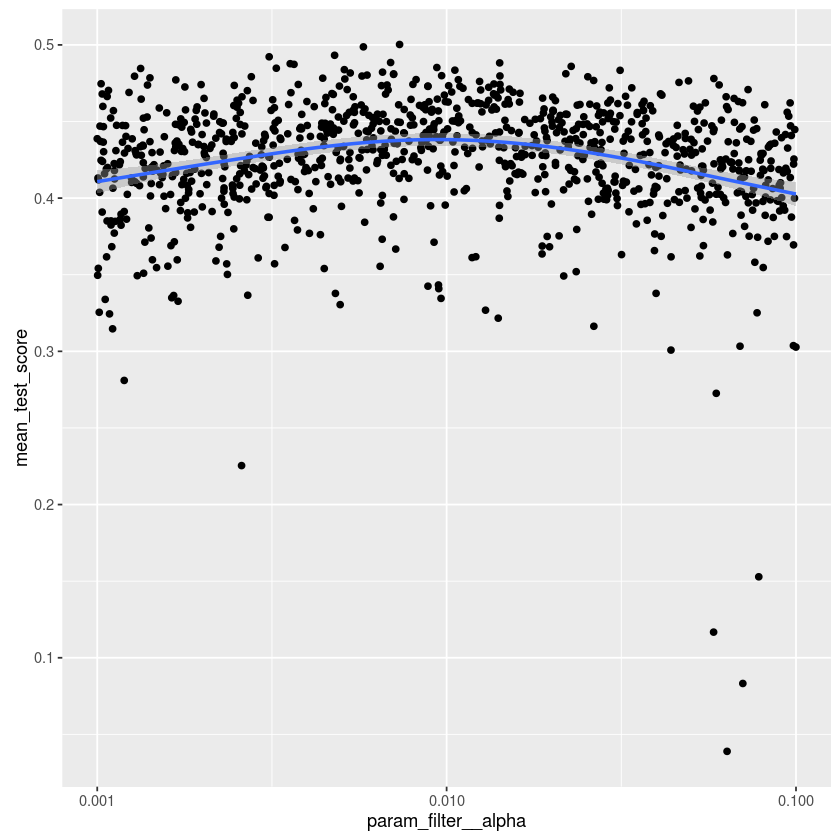

In [12]:
ggplot(df) +
  aes_string(x = params[1], y = "mean_test_score") +
  geom_point() + 
  scale_x_log10() + 
  geom_smooth() 

# Parameter: mlp__activation
Relu is best but has some really worse performing outliers.

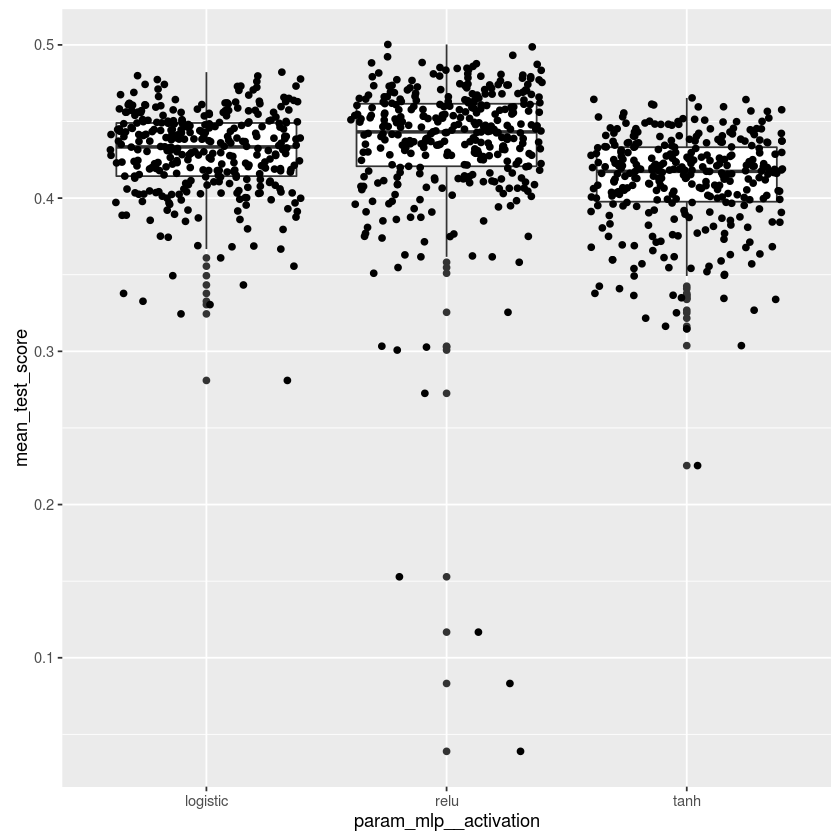

In [14]:
ggplot(df) +
  aes_string(x = params[2], y = "mean_test_score") +
  geom_boxplot() + 
  geom_jitter()

# Parameter: mlp__alpha
No effect

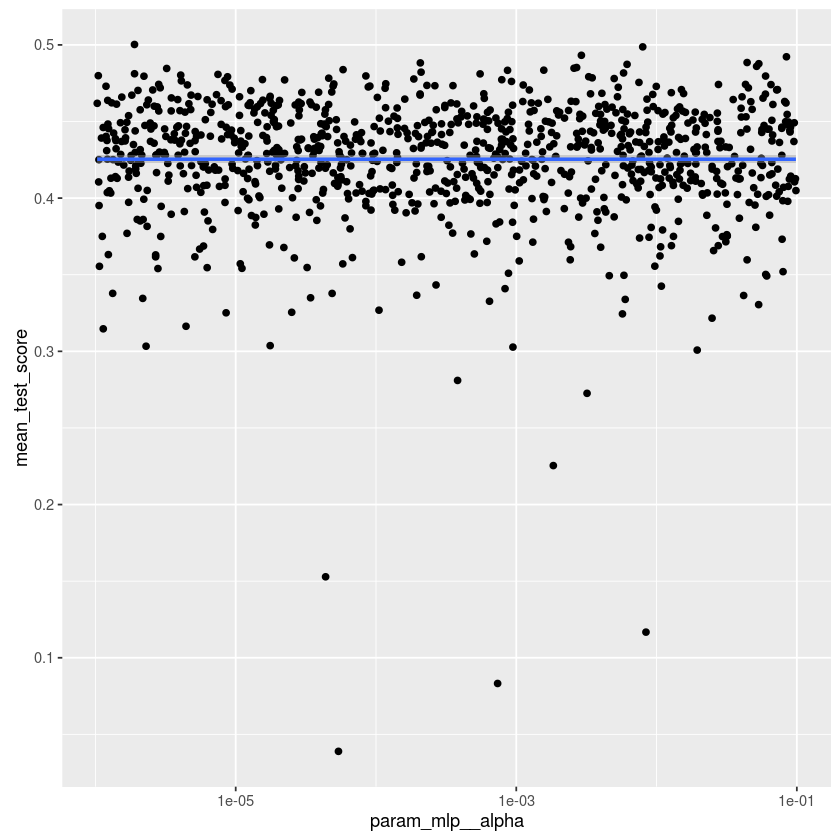

In [18]:
ggplot(df) +
  aes_string(x = params[3], y = "mean_test_score") +
  geom_point() + 
  scale_x_log10() + 
  geom_smooth() 

# Parameter: mlp__hidden_layer_size
More is better, at least 100

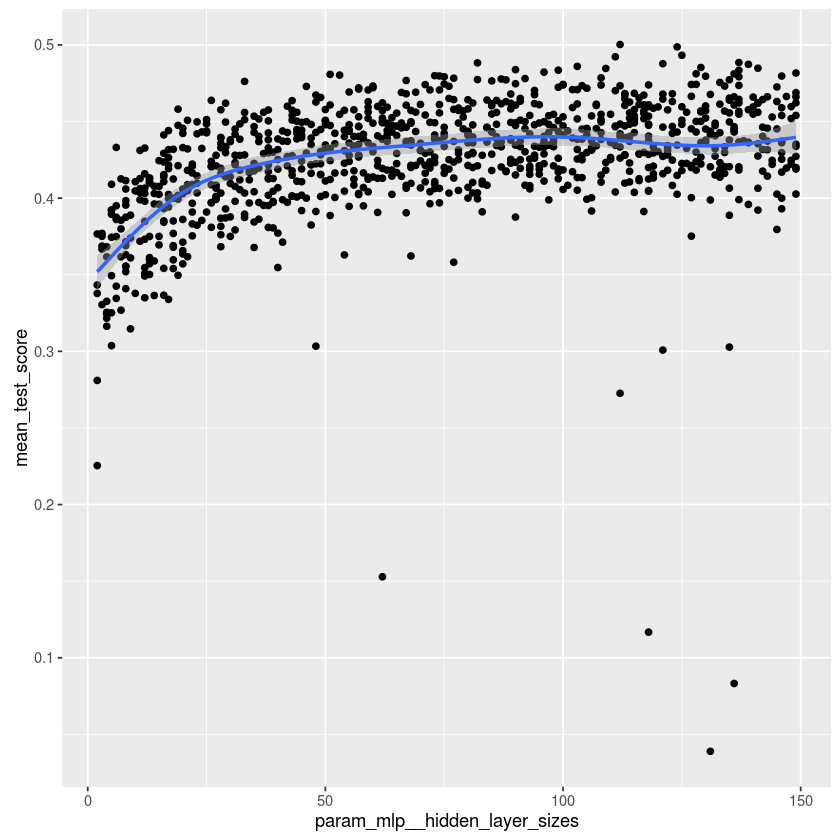

In [21]:
ggplot(df) +
  aes_string(x = params[4], y = "mean_test_score") +
  geom_point() + 
  geom_smooth() 

# Parameter: mlp__learning_rate_init
No effect

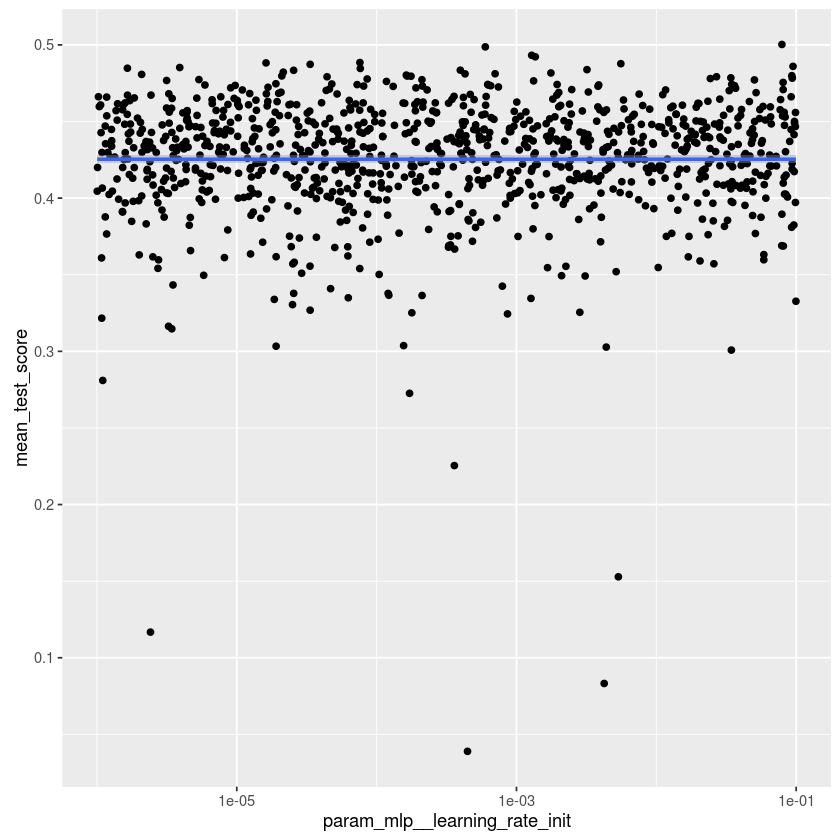

In [22]:
ggplot(df) +
  aes_string(x = params[6], y = "mean_test_score") +
  geom_point() + 
  scale_x_log10() +
  geom_smooth() 